# Week 1 Challenge Project
### Lyle Lalunio
---
Hypothyroidism, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone. It can cause a number of symptoms, such as poor ability to tolerate cold, a feeling of tiredness, constipation, depression, and weight gain. Occasionally there may be swelling of the front part of the neck due to goitre. Untreated hypothyroidism during pregnancy can lead to delays in growth and intellectual development in the baby or cretinism.

Worldwide, too little iodine in the diet is the most common cause of hypothyroidism. In countries with enough iodine in the diet, the most common cause of hypothyroidism is the autoimmune condition Hashimoto's thyroiditis. Less common causes include: previous treatment with radioactive iodine, injury to the hypothalamus or the anterior pituitary gland, certain medications, a lack of a functioning thyroid at birth, or previous thyroid surgery. The diagnosis of hypothyroidism, when suspected, can be confirmed with blood tests measuring thyroid-stimulating hormone (TSH) and thyroxine levels.

Worldwide about one billion people are estimated to be iodine deficient; however, it is unknown how often this results in hypothyroidism. In the United States, hypothyroidism occurs in 0.3–0.4% of people.

And that is why we iodize salt.

![alt text](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/11/15/17/39/ds00181_-ds00344_-ds00353_-ds00491_-ds00492_-ds00567_-ds00660_-my00709_im01872_thyroid_gif.jpg)



Background: Doctors all around the world need our help to predict whether a patient has hypothyroid disease. We have already overspent our budget to collect such complete data on about 30 attributes for 2800 patients--a good starting number, but a larger sample would certainly be preferred. Moving forward, however, we simply cannot afford to spend so much money on data collection. Therefore, we also need to determine which attributes are the most meaningful to the predictive models, and cut out the rest that don't contribute much. 

The boss wants to see a **balanced** model that can predict with a **high sensitivity** and **high specificity** while using a ***low amount of features***. Collecting complete data such as this is very rare, very time-consuming, and often very expensive. By minimizing the number of features, it will optimize future data collection by deciding what needs to be collected, and what doesn't.

## Loading the data

Let's read the data into a Pandas dataframe and look at the first 20 records.

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/Medlytics2022/Week1/master/Datasets/allhypo.train.data"
dataset = pd.read_csv(url) 
dataset.head(10)

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative.|3434
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,negative.|1595
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,negative.|1367
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,negative.|1787
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,negative.|2534


In [ ]:
dataset.columns = ['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine', 'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium', 'Goiter', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH', 'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U', 'FTI Measured', 'FTI', 'TBG Measured', 'TBG', 'Referral Source', 'Class']

Great, looks like the data loaded in properly. Let's continue looking at some summary statistics on our data.

## Viewing summary statistics
The functions describe() and info() are your friends

In [ ]:
# output high-level column statistics
dataset.describe()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Class
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,94,3,2,2,2,2,2,2,2,2,...,2,218,2,139,2,210,1,1,5,2800
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative.|2825
freq,75,1830,2470,2760,2766,2690,2759,2761,2752,2637,...,2616,184,2503,297,2505,295,2800,2800,1632,1


In [ ]:
# output information about the data including the index dtype and column dtypes, non-null values and memory usage
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2800 non-null   object
 1   Sex                        2800 non-null   object
 2   On Thyroxine               2800 non-null   object
 3   Query on Thyroxine         2800 non-null   object
 4   On Antithyroid Medication  2800 non-null   object
 5   Sick                       2800 non-null   object
 6   Pregnant                   2800 non-null   object
 7   Thyroid Surgery            2800 non-null   object
 8   I131 Treatment             2800 non-null   object
 9   Query Hypothyroid          2800 non-null   object
 10  Query Hyperthyroid         2800 non-null   object
 11  Lithium                    2800 non-null   object
 12  Goiter                     2800 non-null   object
 13  Tumor                      2800 non-null   object
 14  Hypopitu

Note the data types are all objects--even columns that are obviously numeric like Age. This is because there are "?" values for some of the cells, making pandas interpret these columns as non-null objects (instead of int, for example).

## Data cleaning

To start, let's make all the numerical columns contain the correct type of values and change the data type of those columns to numeric. Let's also replace all those question marks with the median of the respective column.

Hint: To make it easier, first try converting all the "?" to NaN.

In [ ]:
import numpy as np

dataset[dataset=='?'] = np.nan

Hmm, still looks like the TBG column is unfilled, implying it was empty to begin with. Let's get rid of this column, then (and make sure to get rid of it in your list of numeric columns, too!)

In [ ]:
# drop columns that do not contain useful information (all 2800 data points have the same value)
drop_columns = ["TBG", "TBG Measured"]
try:
    dataset=dataset.drop(drop_columns,axis=1)
except:
    print("Can't drop columns {}, they may not exist".format(drop_columns))
    
# identify columns by what time of data they hold
numeric_columns = list(["Age","TSH","T3","TT4","T4U","FTI"])

# categorical columns are everything else (minus 'class')
categorical_columns = list(set(dataset.columns)-set(numeric_columns)-set(['Class']))


# convert numeric columns from strings to numbers
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric)

categorical_columns = list(set(categorical_columns)-set(drop_columns))

print('Categorical Columns: ', categorical_columns)

Categorical Columns:  ['Query on Thyroxine', 'Query Hyperthyroid', 'Psych', 'On Thyroxine', 'TT4 Measured', 'T3 Measured', 'I131 Treatment', 'Referral Source', 'Tumor', 'Pregnant', 'T4U Measured', 'FTI Measured', 'On Antithyroid Medication', 'Goiter', 'Query Hypothyroid', 'Sick', 'Lithium', 'Thyroid Surgery', 'Sex', 'TSH Measured', 'Hypopituitary']


All right, let's take a look now at the info of *just the numeric columns* in the dataset:

In [ ]:
dataset[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2799 non-null   float64
 1   TSH     2516 non-null   float64
 2   T3      2215 non-null   float64
 3   TT4     2616 non-null   float64
 4   T4U     2503 non-null   float64
 5   FTI     2505 non-null   float64
dtypes: float64(6)
memory usage: 131.4 KB


Perfect, now let's fix that class feature. According to the note the data collectors included with this data, the ".|####" refers to a patient number, and is not necessarily relevant for our purposes here.

In [ ]:
import re  

# define the regular expression for the ".|####" part of dataset['class']

regex_pattern = ( "\."   # looks for the period...
                  "\|"   # followed by a pipe...
                  "\d+") # followed by one or more digit

for index, row in dataset.iterrows():
    
    # substitute instances of our regex_pattern for an empty string
    new_class = re.sub(regex_pattern, '', row['Class'])
    dataset.loc[index,'Class']=new_class

dataset.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Referral Source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative


Let's run the describe() function on just the "class" column.

In [ ]:
dataset['Class'].describe()

count         2800
unique           4
top       negative
freq          2580
Name: Class, dtype: object

It looks like there are actually 4 unique classification variables! Thank goodness we didn't assume it was binary.

Display all the unique values in the class column.

In [ ]:
dataset['Class'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

But let's make it binary for the sake of this example anyway. If you finish early later on, try the multiclass classifier with all 4 values!

In [ ]:
dataset['Class'] = dataset['Class'].replace('negative', 0)                    
dataset['Class'] = dataset['Class'].replace('compensated hypothyroid', 1)     
dataset['Class'] = dataset['Class'].replace('primary hypothyroid', 1)         
dataset['Class'] = dataset['Class'].replace('secondary hypothyroid', 1)


Before we move on, let's not forget to run the describe() function on just  your categorical columns, too.
Compare it to the describe() that your numeric columns produce.

In [ ]:
dataset.describe()

,Age,TSH,T3,TT4,T4U,FTI,Class
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000,2800.000000
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984,0.078571
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986,0.269117
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000,0.000000
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000,0.000000
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000,0.000000
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000,0.000000
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000,1.000000


Great! Let's see if there's any other records we have to address. count() is a nice way to check if we have any other missing values.

In [ ]:
dataset.count()

Age                          2799
Sex                          2690
On Thyroxine                 2800
Query on Thyroxine           2800
On Antithyroid Medication    2800
Sick                         2800
Pregnant                     2800
Thyroid Surgery              2800
I131 Treatment               2800
Query Hypothyroid            2800
Query Hyperthyroid           2800
Lithium                      2800
Goiter                       2800
Tumor                        2800
Hypopituitary                2800
Psych                        2800
TSH Measured                 2800
TSH                          2516
T3 Measured                  2800
T3                           2215
TT4 Measured                 2800
TT4                          2616
T4U Measured                 2800
T4U                          2503
FTI Measured                 2800
FTI                          2505
Referral Source              2800
Class                        2800
dtype: int64

We could replace the missing values in proportion to the current number of males and females over the total, but that is making an assumption we don't have to make. For now, let's simply cut the records of all these sexless people out of our data.

In [ ]:
dataset = dataset.dropna(axis='rows')
dataset.count()

Age                          1947
Sex                          1947
On Thyroxine                 1947
Query on Thyroxine           1947
On Antithyroid Medication    1947
Sick                         1947
Pregnant                     1947
Thyroid Surgery              1947
I131 Treatment               1947
Query Hypothyroid            1947
Query Hyperthyroid           1947
Lithium                      1947
Goiter                       1947
Tumor                        1947
Hypopituitary                1947
Psych                        1947
TSH Measured                 1947
TSH                          1947
T3 Measured                  1947
T3                           1947
TT4 Measured                 1947
TT4                          1947
T4U Measured                 1947
T4U                          1947
FTI Measured                 1947
FTI                          1947
Referral Source              1947
Class                        1947
dtype: int64

Nice! Now we have a pretty clean dataset to work with. Let's now do some further data analysis and visualization to better understand what we're working with.

## Data analysis and visualization

Check the correlation of the dataset

In [ ]:
dataset.corr()

,Age,TSH,T3,TT4,T4U,FTI,Class
Age,1.000000,-0.030174,-0.255721,-0.074538,-0.169724,0.030368,-0.002796
TSH,-0.030174,1.000000,-0.180425,-0.288273,0.055912,-0.331063,0.470658
T3,-0.255721,-0.180425,1.000000,0.581830,0.465673,0.346873,-0.183115
TT4,-0.074538,-0.288273,0.581830,1.000000,0.450527,0.786326,-0.288600
T4U,-0.169724,0.055912,0.465673,0.450527,1.000000,-0.170805,0.020149
FTI,0.030368,-0.331063,0.346873,0.786326,-0.170805,1.000000,-0.323631
Class,-0.002796,0.470658,-0.183115,-0.288600,0.020149,-0.323631,1.000000


In [ ]:
_deepnote_run_altair(dataset, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"FTI","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"Class","type":"nominal","sort":{"order":"descending","encoding":"y"},"scale":{"type":"linear","zero":false},"bin":false},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

Convert the class feature to numeric so we can also see the correlations it has with the numeric features, and check the correlation again.

Let's do some further visual analysis using a new module called seaborn. Explore its incredible versatility and diversity with data visualization here: https://seaborn.pydata.org/

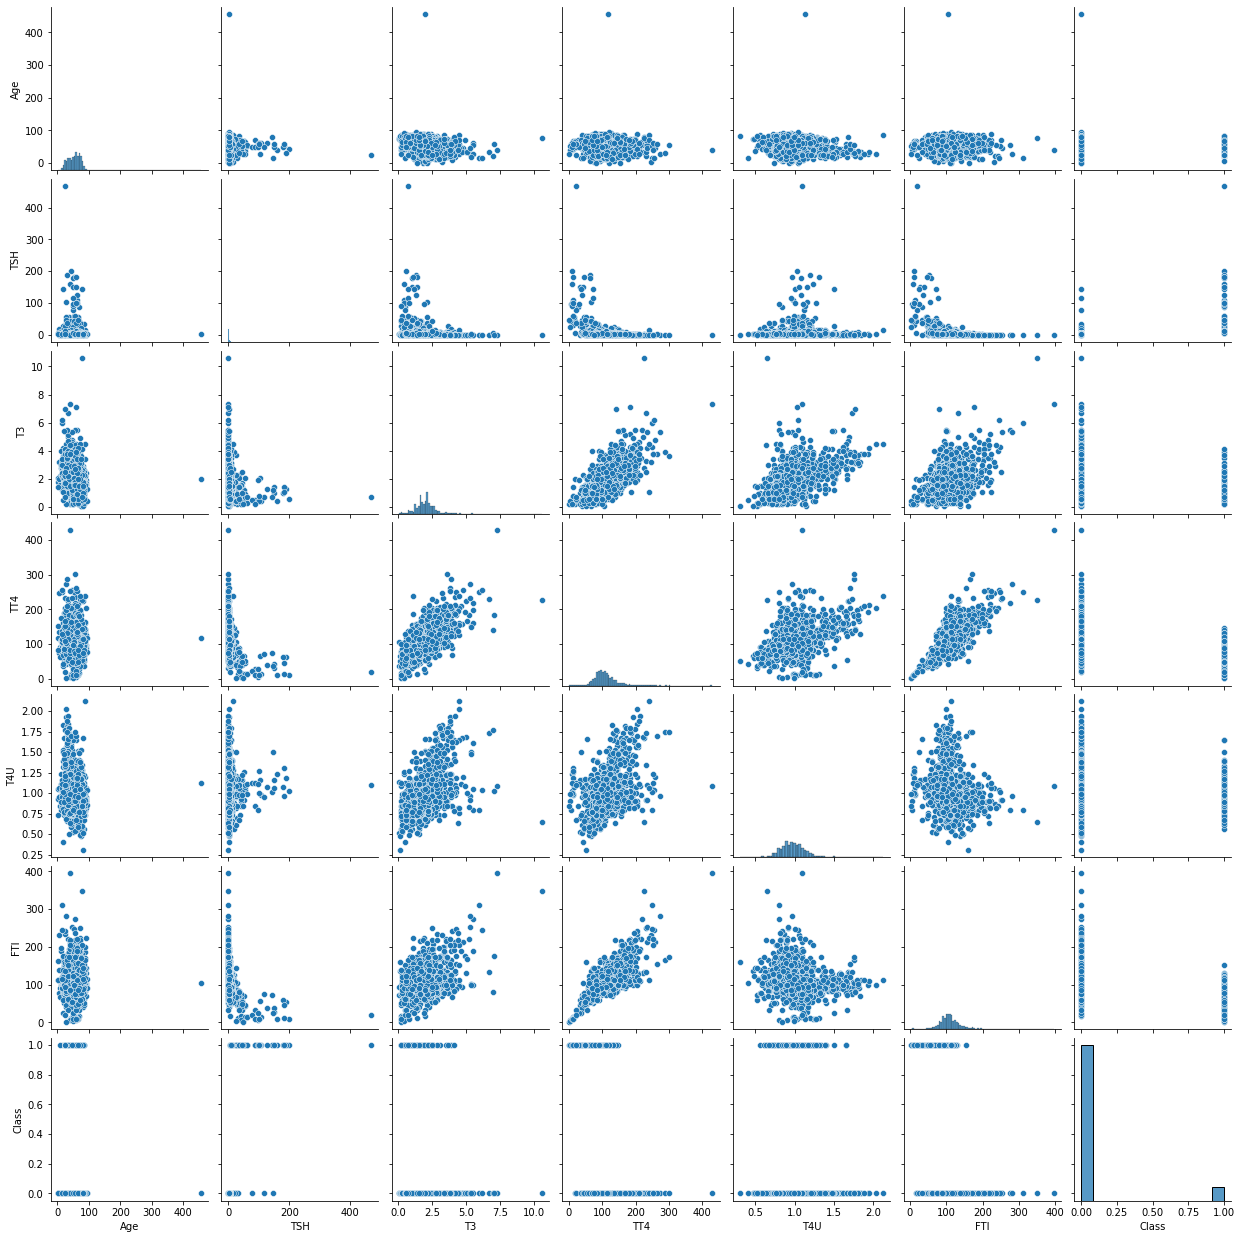

In [ ]:
import seaborn as sns
sns.pairplot(dataset)

OK! I think we're ready to create and select some supervised learning models. To get the ball rolling, select Age and Sex as our explanatory features (and class as the target feature, obviously).

## Model training and selection

Let's dummy the categorical variables (but not the class value!) and view the column names to select some for our model.

In [ ]:
drop_columns = ["T4U Measured","FTI Measured","T3 Measured","TSH Measured","TT4 Measured"]
try:
    dataset=dataset.drop(drop_columns, axis=1)
except:
    print("Can't drop columns {}, they may not exist".format(drop_columns))

categorical_columns = list(set(categorical_columns)-set(drop_columns))

# convert categorical columns to indicator (0,1) variables
for col in categorical_columns:
    dataset[col] = pd.get_dummies(dataset[col],drop_first=True)
    
dataset.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Referral Source,Class
0,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.30,2.5,125.0,1.14,109.0,1,0
4,70.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61.0,0.87,70.0,0,0
7,80.0,0,0,0,0,0,0,0,0,0,...,0,0,0,2.20,0.6,80.0,0.70,115.0,0,0
8,66.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.60,2.2,123.0,0.93,132.0,0,0
9,68.0,1,0,0,0,0,0,0,0,0,...,0,0,0,2.40,1.6,83.0,0.89,93.0,0,0


All right, let's now split our data into training and testing in an 80-20 split. For consistency, let's all use a seed of 8675309.

In [ ]:
from sklearn.model_selection import train_test_split

## Your code here
data_train, data_val = train_test_split(dataset, test_size=0.20, random_state=8675309, stratify=dataset['Class'])

X_train = data_train[["TSH","FTI"]]
X_val = data_val[["TSH","FTI"]]

y_train = data_train['Class']
y_val = data_val['Class']

X_train.head()

,TSH,FTI
934,0.9,109.0
1837,1.8,105.0
676,0.2,96.0
1966,0.8,100.0
2362,2.1,113.0


For reusability, let's make a logistic regression function that will take our training and testing data as arguments. Inside the function, build a model on your training data, fit it with your training class data, and return a list of your predictions.

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def log_reg(train_X,train_Y,test_X,test_Y):
    logreg = LogisticRegression()
    logreg.fit(train_X, train_Y)
    y_train_pred=logreg.predict(train_X)
    predictions = logreg.predict(test_X)
    print("Training Accuracy is ", accuracy_score(train_Y, y_train_pred)*100)
    print("Validation Accuracy is ", accuracy_score(test_Y, predictions)*100)
    return predictions
		


Fantastic, we have just built a logistic regression model! Let's go see how well it performs.

### Model evaluation

To start, let's establish the baseline performance. This is important because it provides a starting point of comparison for later evaluation methods, like accuracy.

A good baseline model to use is the Zero Rule algorithm. In classification problems, it simply predicts the class value with the greatest number of instances every time.

In [ ]:
from collections import Counter
def zero_rule_algorithm_classification(train,test):
    occurence_count = Counter(train)
    winner = occurence_count.most_common(1)[0][0]
    return [winner for i in range(len(test))]

Get your baseline performance by calculating the accuracy of your Zero Rule algorithm.

In [ ]:
from sklearn.metrics import accuracy_score
predictions = zero_rule_algorithm_classification(y_train, X_val)
print(accuracy_score(y_val, predictions)*100)

92.05128205128204


So maybe accuracy isn't the best performance measure for this dataset. As you've seen already, even when the models predict "negative" for all the records, we could already achieve a ~92% accuracy. However, that also implies we incorrectly predicted 100% of the positive cases, which in the context of this problem, is fatal.

Thankfully, it isn't the only way to evaluate your model. Let's take a look at a confusion matrix.

![alt text](https://i.imgur.com/uipmEwt.png)

Create a confusion matrix using the logistic regression function you built earlier.

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = log_reg(X_train,y_train,X_val,y_val)

labels = [0,1]
cm = metrics.confusion_matrix(y_val, predictions, labels = labels)
print(cm)


Training Accuracy is  95.56840077071291
Validation Accuracy is  95.64102564102565
[[352   7]
 [ 10  21]]



Yet another appropriate metric is the Area Under the Receiver Operator Curve. Specifically, the diagnostic performance of a test, or the accuracy of a test to discriminate diseased cases from normal cases is evaluated using Receiver Operating Characteristic (ROC) curve analysis.

When you consider the results of a particular test in two populations, one population with a disease, the other population without the disease, you will rarely observe a perfect separation between the two groups. Hence, the overlapping areas in the diagram below (FN, FP).

In a Receiver Operating Characteristic (ROC) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. A test with perfect discrimination (no overlap in the two distributions) has a ROC curve that passes through the upper left corner (100% sensitivity, 100% specificity). Therefore the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test.

![alt text](https://www.medcalc.org/manual/_help/images/roc_intro1.png)





Now, to graph the AUROC curve, we will need to predict probabilities of choosing a specific class value rather than the class value itself. Make a new logistic regression model that does so.

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train,y_train)
labels = [0,1]
y_val_prob = reg.predict_proba(X_val)
y_val_pred = reg.predict(X_val)


Now calculate the area under the receiver operator curve with your predictions.

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

roc_auc = metrics.auc(fpr, tpr)


Now graph the ROC curve using matplotlib, fully labeled.

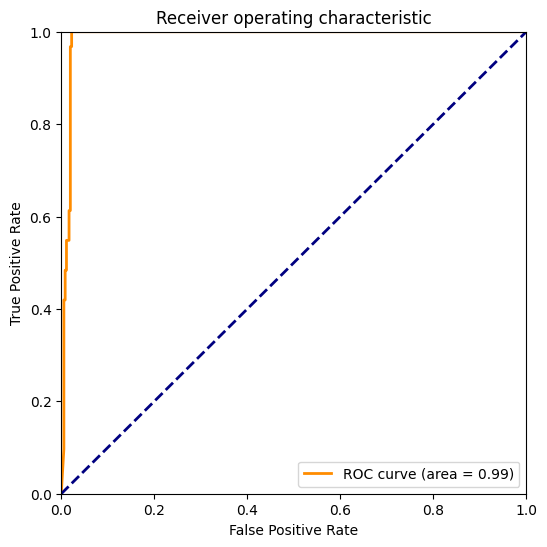

AUC 0.9879593853895229


In [ ]:
import matplotlib.pyplot as plt

### Your code here
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC", roc_auc)

In conclusion, it looks like this model performed pretty bad. It's probably best to try out different columns or perhaps use a different model before we submit our model for scoring.

# Random Forest

Training Accuracy is  99.93577392421324
Validation Accuracy is  97.94871794871794


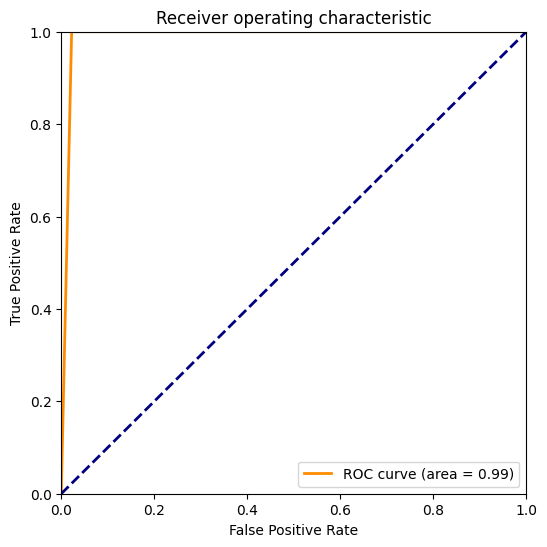

AUC 0.988857938718663


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating a model w sklearn's RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
# fit model
random_forest.fit(X_train, y_train)
# predict
y_train_pred= random_forest.predict(X_train)
predictions = random_forest.predict(X_val)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
print("Validation Accuracy is ", accuracy_score(y_val, predictions)*100)
# get metrics
fpr, tpr, thresholds = metrics.roc_curve(y_val, predictions)

roc_auc = metrics.auc(fpr, tpr)
# plot roc + auc
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC", roc_auc)

## kNN

Optimal k: 3
Training Accuracy is  98.330122029544
Validation Accuracy is  97.6923076923077


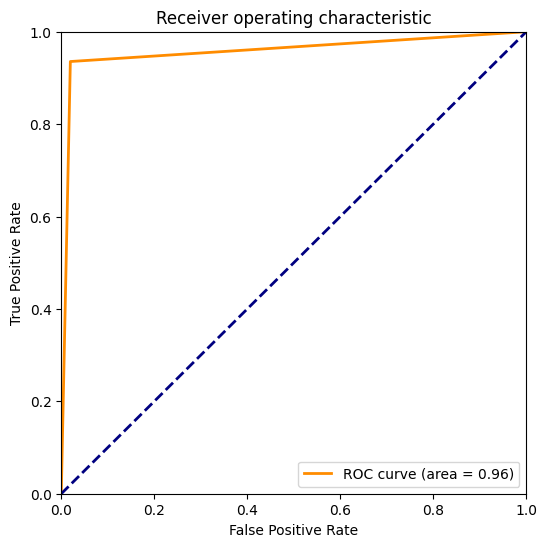

AUC 0.957992631862701


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import math

# find best k
max_roc_auc = 0
opt_k = -1
for i in range(1,len(X_val)):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train, y_train)

    y_train_pred= knn.predict(X_train)
    predictions = knn.predict(X_val)
    fpr, tpr, thresholds = metrics.roc_curve(y_val, predictions)

    roc_auc = metrics.auc(fpr, tpr)
    if roc_auc > max_roc_auc:
        max_roc_auc = roc_auc
        opt_k = i

# make knn model w/ best k 
print("Optimal k:", opt_k)
knn = KNeighborsClassifier(n_neighbors=opt_k)

knn.fit(X_train, y_train)

y_train_pred= knn.predict(X_train)
predictions = knn.predict(X_val)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
print("Validation Accuracy is ", accuracy_score(y_val, predictions)*100)

# graph roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, predictions)

roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC", roc_auc)

# Submitting your Model

Once you believe to have found the best classifier, run your classifier on the test data and make a pickle file containing of your predictions contained a pandas dataframe.

This pandas dataframe will contain three columns for your binary classifier (or 5 columns for the multiclass classifier): the first column should be your model's "best guess" for each patient (either 0 or 1, negative or positive) and the last two columns should be the probability the patient would be classified as either a 0 or 1.

(see below for reference)

In [ ]:
# after running this cell, you should see the pickle file pop up in the file explorer to the left
# use the three dots next to the filename to download the file
# after downloading the pickle file, email it to medlytics-22@mit.edu
import pickle
predictions = pd.DataFrame({"guesses":y_val_pred,"prob_neg":y_val_prob[:,0],"prob_pos":y_val_prob[:,1]})
prediction_pickle_path = 'Team 9_binary_prediction_pickle.pkl'

# Create an variable to pickle and open it in write mode
prediction_pickle = open(prediction_pickle_path, 'wb')
pickle.dump(predictions, prediction_pickle)

prediction_pickle.close()

In [ ]:
prediction_unpickle = open(prediction_pickle_path, 'rb')
 
# load the unpickle object into a variable
predictions = pickle.load(prediction_unpickle)
 
print(predictions)

     guesses  prob_neg  prob_pos
0          0  0.967598  0.032402
1          1  0.000000  1.000000
2          0  0.934186  0.065814
3          0  0.986602  0.013398
4          0  0.980364  0.019636
..       ...       ...       ...
385        0  0.989814  0.010186
386        0  0.995650  0.004350
387        0  0.985182  0.014818
388        0  0.973909  0.026091
389        0  0.976358  0.023642

[390 rows x 3 columns]


# Scoring your Model


**Area Under ROC Curve**: A receiver operating characteristic (ROC) curve plots the true positive rate (y) against the false positive rate (x) at many decision threshold settings (output < threshold = 0, output > threshold = 1). The area under this curve represents the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.

**Confusion Matrix**: You will receive a certain number of points for each correct classification and a certain point penalty for each incorrect classification. The points are weighted, and are designed to equate to 0 in a Zero Rule baseline model. This point scheme is designed to punish you heavily for predicting false positives (FP) and false negatives (FN)--FN cases especially. In doing so, we hope you see the importance of clinical considerations and treat your models from a more human perspective, rather than detached from it.

**Real World Cost**: Similar to the confusion matrix, we want you to keep in mind the other aspects of healthcare analytics--in this case, economic feasibility. In essence, we want you to minimize the amount of time and money spent on data collection by reducing the number of features collected. Each record certainly required a lot of time and money from several individuals and businesses to reliably create, and we hope you gain a better understanding of conducting a useful cost-benefit analysis with this scoring method. The full details of the weighted features can be found in the GitHub.

# Moving to the Next Level

For those that finish early, remember how I converted the class values into simply "negative" and "positive"? Now try tackling the multiclass classifier (predicting the different types of positive hypothyroid cases instead of simply negative or positive)! 

The same rules apply!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=85c5176c-5414-4679-aebf-c4b41aad297f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>